In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from ipywidgets import interact
from bokeh.io import output_file, show, output_notebook, curdoc, push_notebook
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, Slider,ColumnDataSource, Select,FixedTicker, PrintfTickFormatter, CrosshairTool, DatetimeTickFormatter, Range1d
from bokeh.models.widgets import Select
from bokeh.layouts import column, row
from bokeh.palettes import Category10, Category20, Inferno
import colorcet as cc
import seaborn as sns
from numpy import linspace
from scipy.stats.kde import gaussian_kde


import datetime
%load_ext blackcellmagic
%matplotlib inline

# Gridwatch - Alll electricity sources

The solar values are distorted massively by two values of 1.42TW which is clearly an error to be corrected

In [2]:
data16 = pd.read_csv('gridwatchAllCols.csv', index_col=1,skip_blank_lines=True, header=[0], parse_dates=True)
#data10.drop('Belgium-UK',1,level=0,inplace=True)
data16.head()
data16.iloc[638919,10] = 1510
data16.iloc[638920,10] = 1510
data16[data16['id']==638925].loc[:,' solar'] = 1510
data16['Hour'] = data16.index.hour
data16['Min'] = data16.index.minute
data16['DayHour'] = data16['Hour'] + data16['Min']/60
data16['Year'] = data16.index.year
data16['Month'] = data16.index.month
data16['Day'] = data16.index.day
data16[data16['DayHour']==1.5].head()
data16[' solar'].max()

C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



9630.0

In [3]:
data161 = data16.reset_index()
print(data161.head())
print(data161.columns)
data161melted = pd.melt(data161.drop([' demand',' timestamp','Min','DayHour','Hour','Day','Month','id',
                                      ' french_ict', ' dutch_ict', ' irish_ict', ' ew_ict', ' nemo', ' other',
                                      ' north_south', ' scotland_england'],axis=1),
                        id_vars=['Year'],
                        var_name='Label')
data161melted['Label'].unique()

            timestamp  id   demand   coal   nuclear   ccgt   wind   pumped  \
0 2011-05-27 15:50:04   4    38874   9316      8221  18239   1253      309   
1 2011-05-27 15:55:02   5    38845   9294      8225  18158   1304      332   
2 2011-05-27 16:00:02   6    38745   9270      8224  18110   1322      285   
3 2011-05-27 16:05:01   7    38826   9262      8220  18114   1364      287   
4 2011-05-27 16:10:02   8    38865   9256      8210  18107   1370      297   

    hydro   biomass  ...   nemo   other   north_south   scotland_england  \
0     636         0  ...      0       0             0                  0   
1     633         0  ...      0       0             0                  0   
2     634         0  ...      0       0             0                  0   
3     635         0  ...      0       0             0                  0   
4     637         0  ...      0       0             0                  0   

   Hour  Min    DayHour  Year  Month  Day  
0    15   50  15.833333  2011 

array([' coal', ' nuclear', ' ccgt', ' wind', ' pumped', ' hydro',
       ' biomass', ' oil', ' solar', ' ocgt', 'Month'], dtype=object)

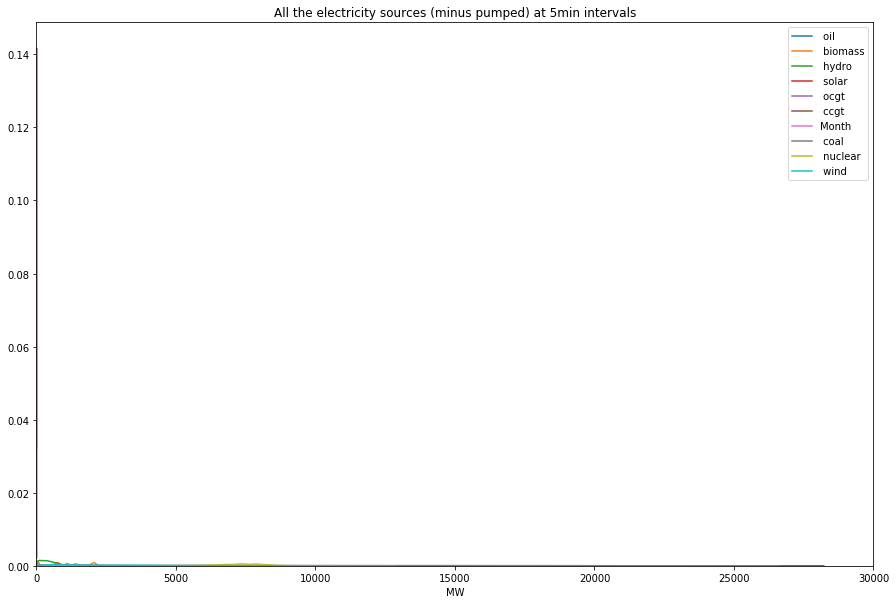

In [4]:
f, axes = plt.subplots(1,1, figsize=(15,10), sharex=True)
axes.set_xlim([0,30000])

notToUse = [' pumped']

for label in (set(data161melted['Label'].unique()) - set(notToUse)):
    sns.distplot(data161[label], hist=False, label=label)
#g = sns.distplot(data121[' wind'], color='red', label='Wind',axlabel='MW')
axes.set(title= 'All the electricity sources (minus pumped) at 5min intervals',\
       xlabel = 'MW')
plt.show()
f.legend()
#f.se

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



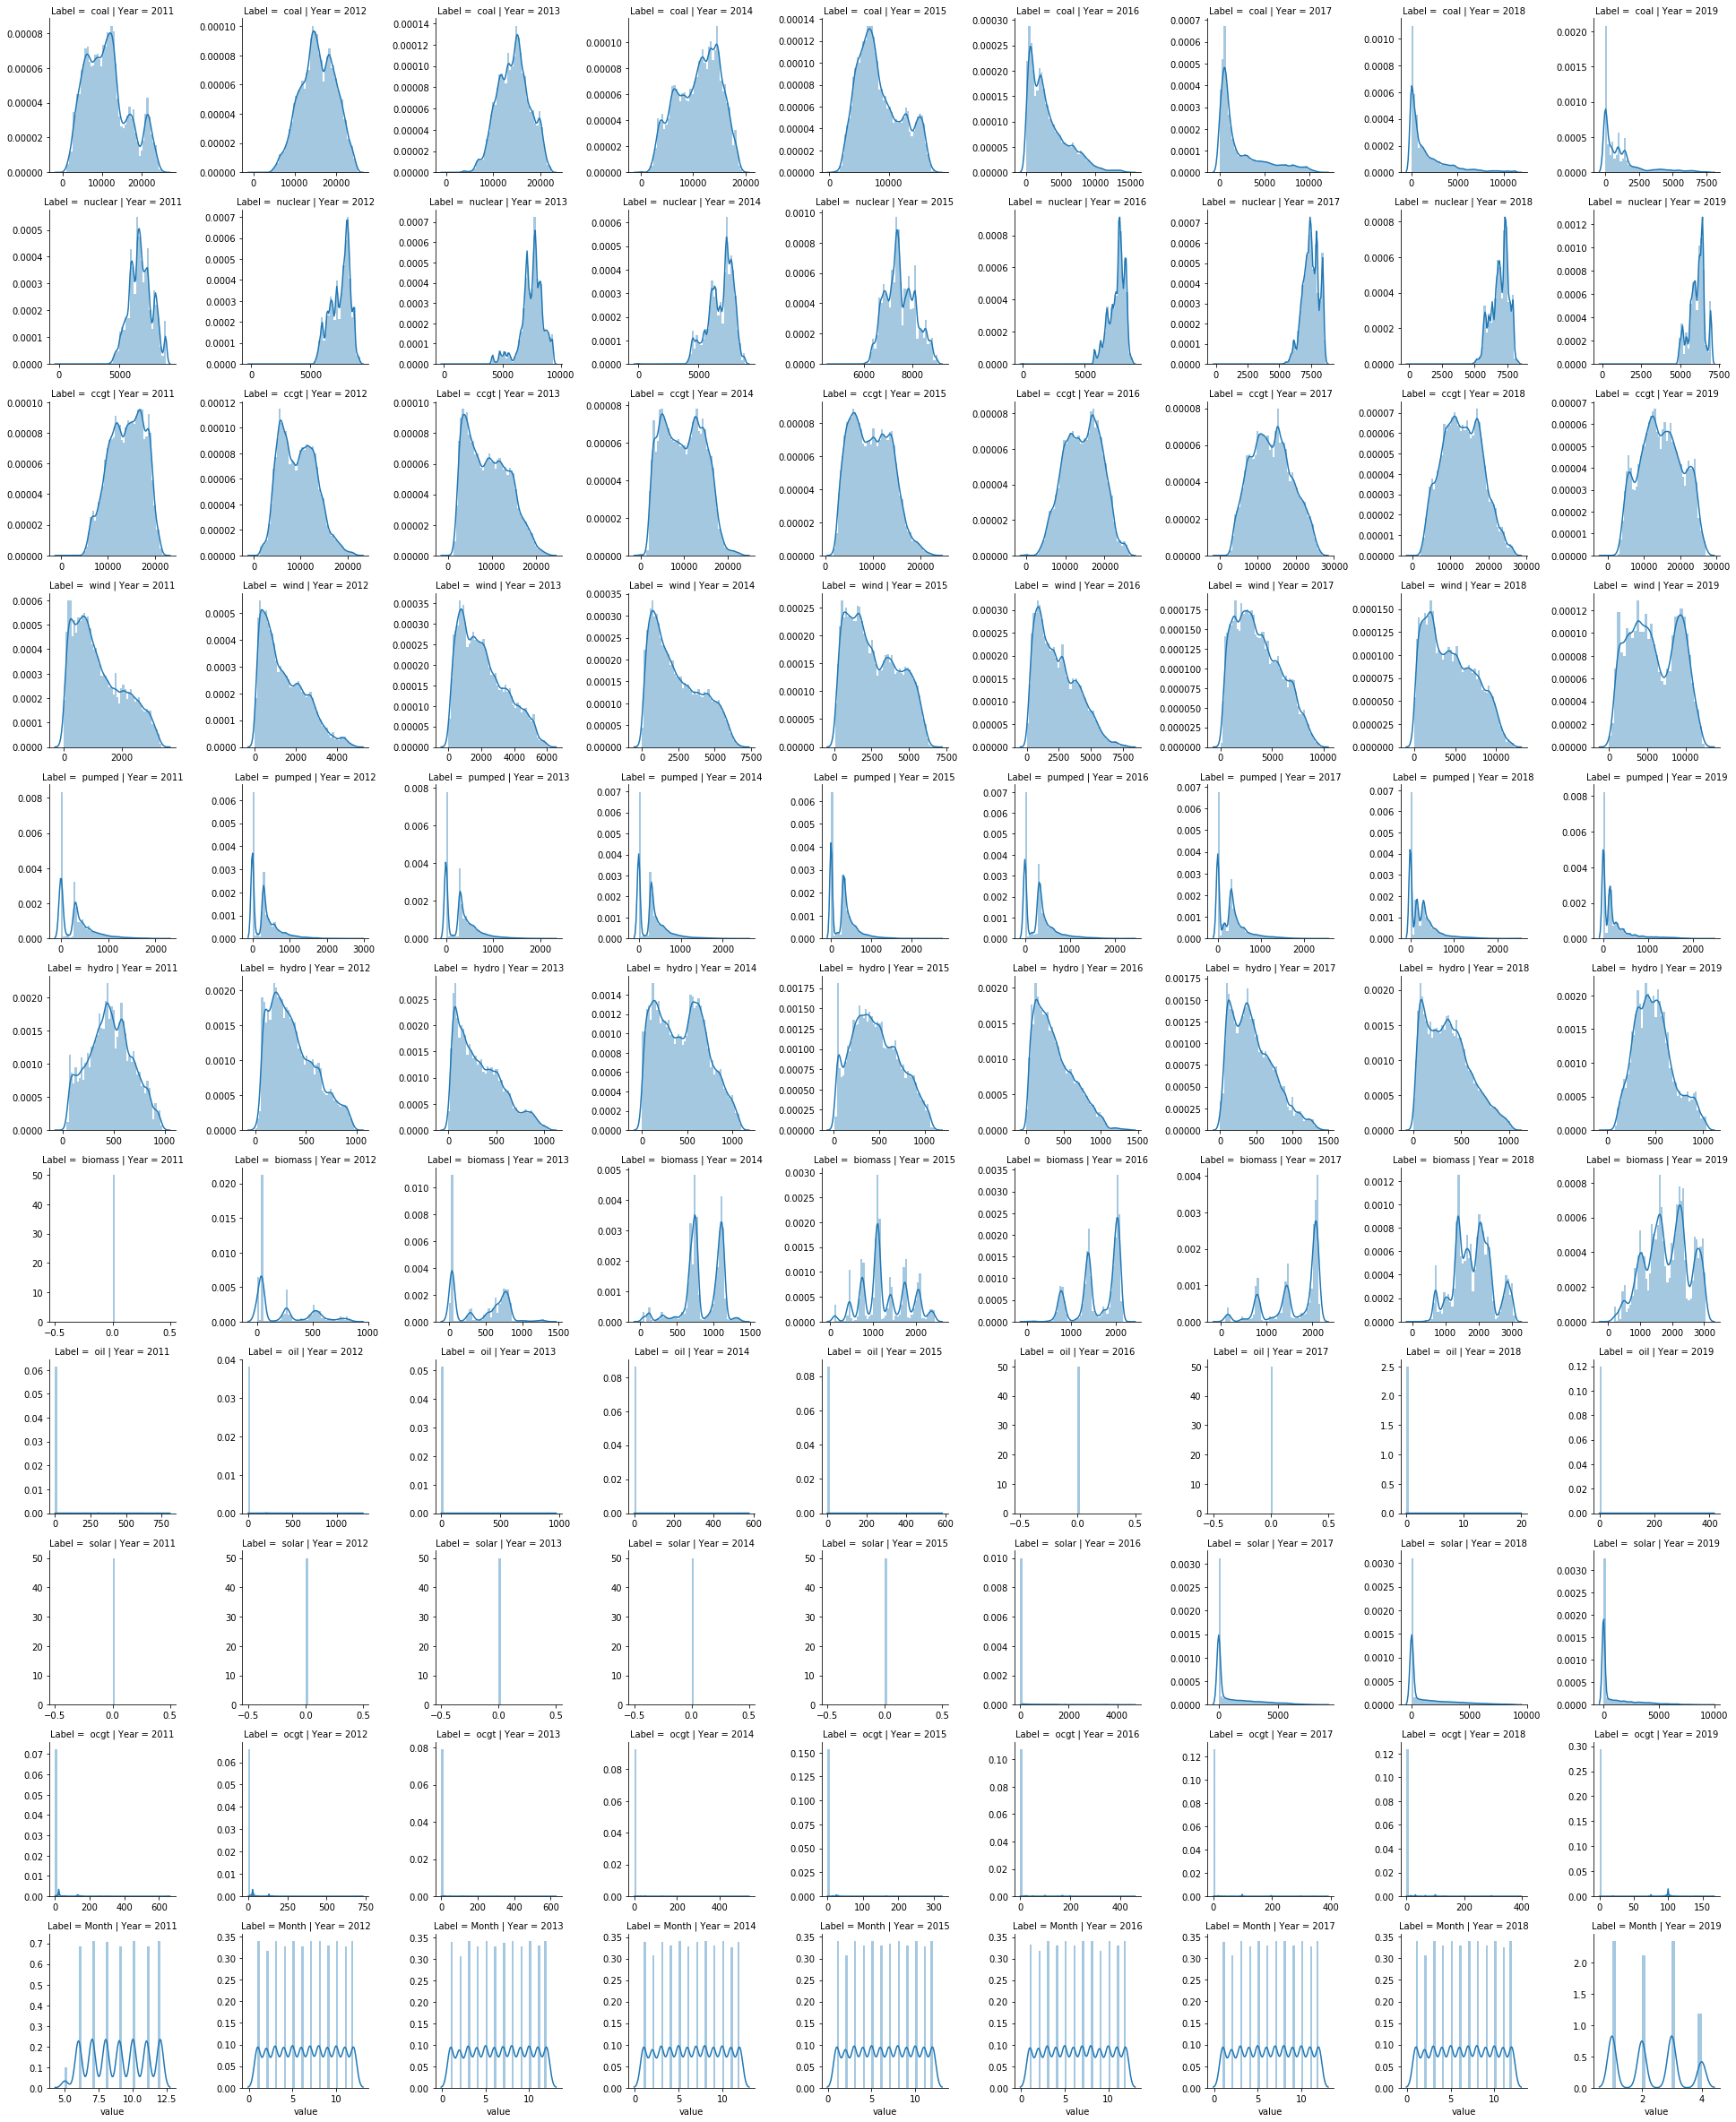

In [5]:
g = sns.FacetGrid(data161melted, row='Label', col='Year',size=3, aspect=1,sharex=False, sharey=False)
g.map(sns.distplot,'value')

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  oil each year from 2011 to 2019


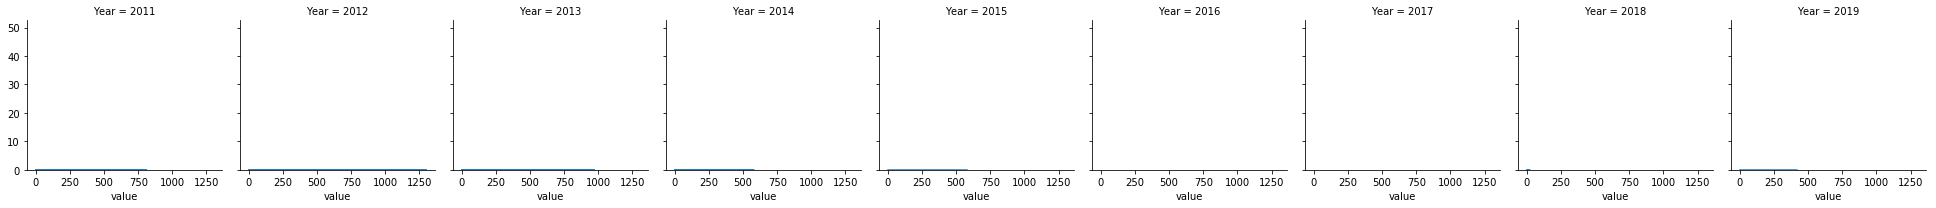

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  biomass each year from 2011 to 2019


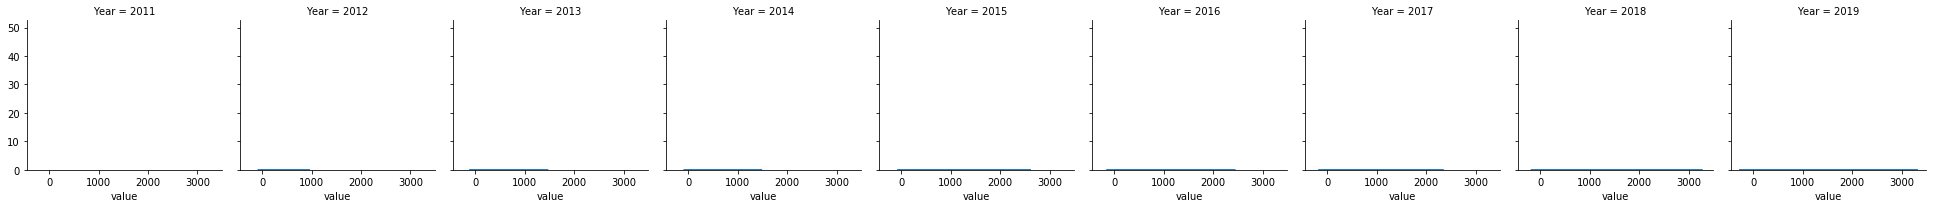

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  hydro each year from 2011 to 2019


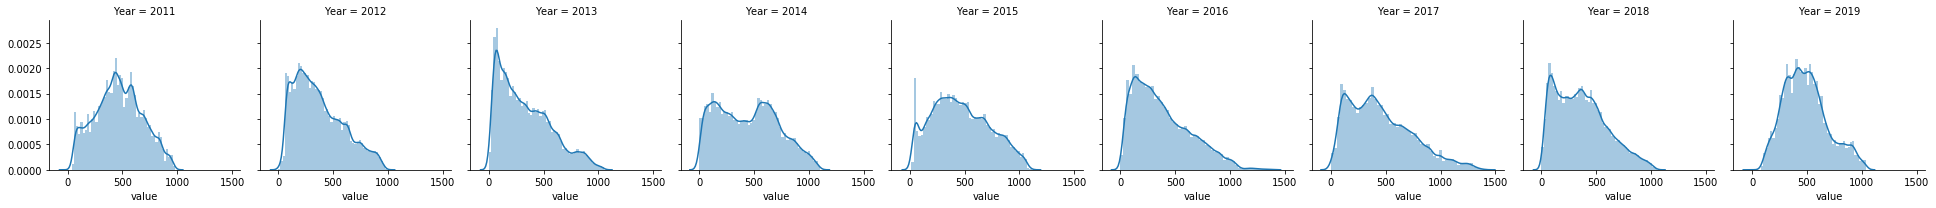

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  solar each year from 2017 to 2019 (only have this data)


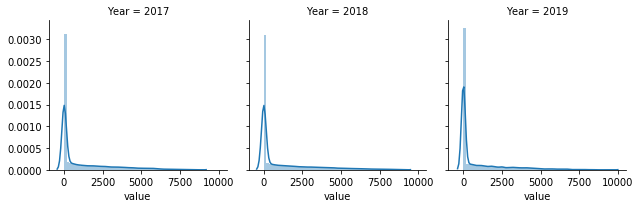

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  ocgt each year from 2011 to 2019


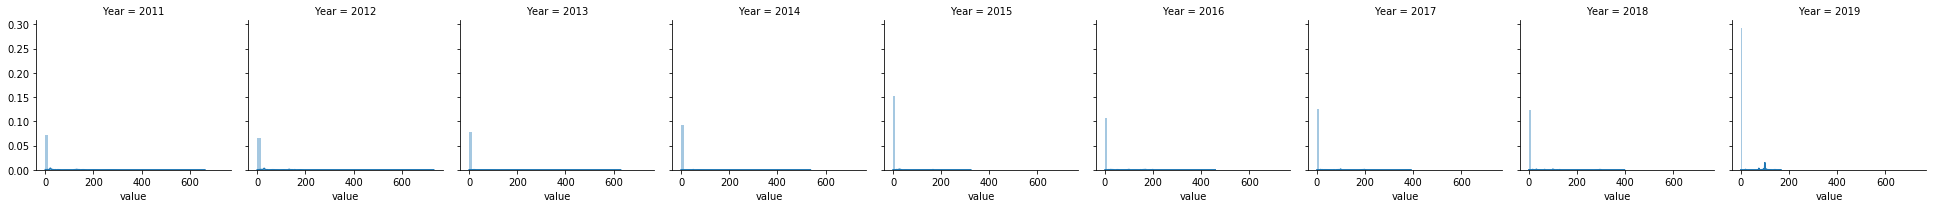

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  ccgt each year from 2011 to 2019


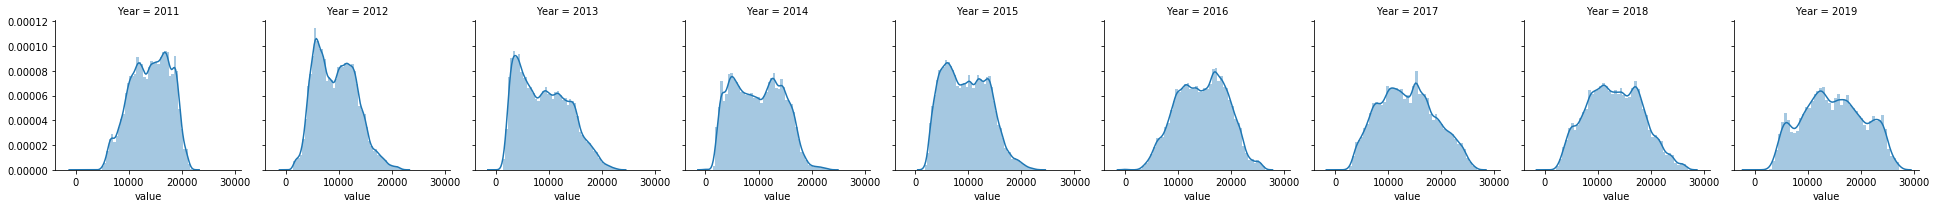

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below: Month each year from 2011 to 2019


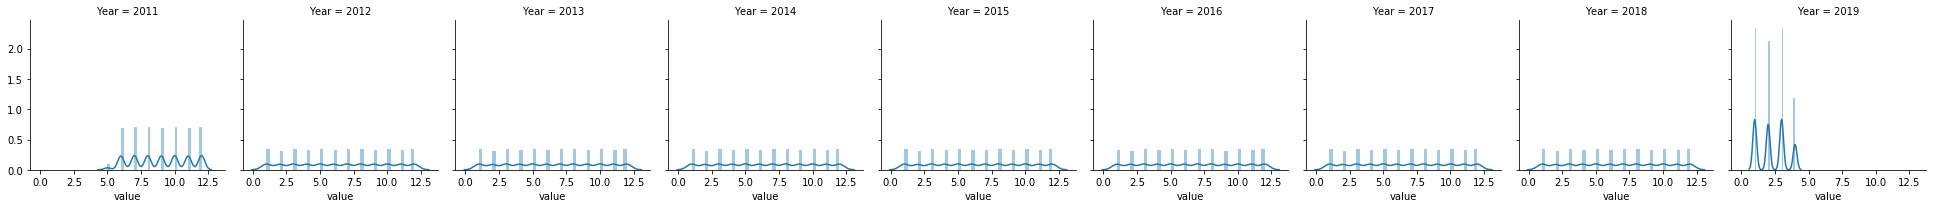

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  coal each year from 2011 to 2019


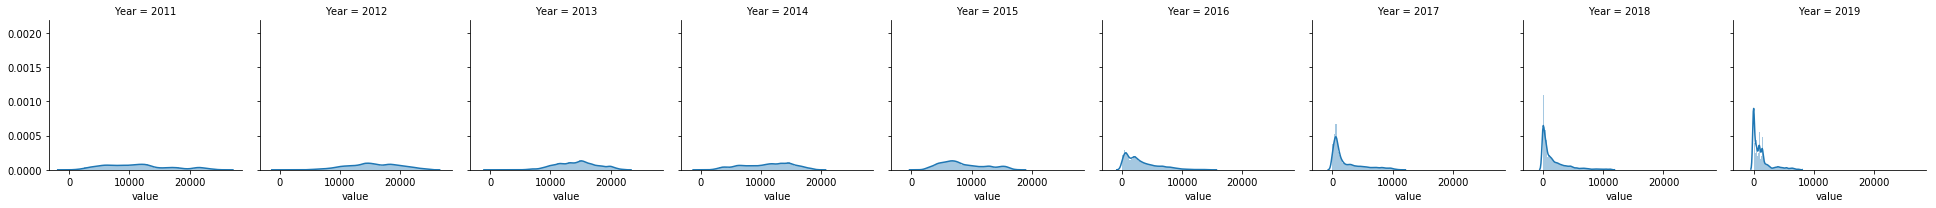

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  nuclear each year from 2011 to 2019


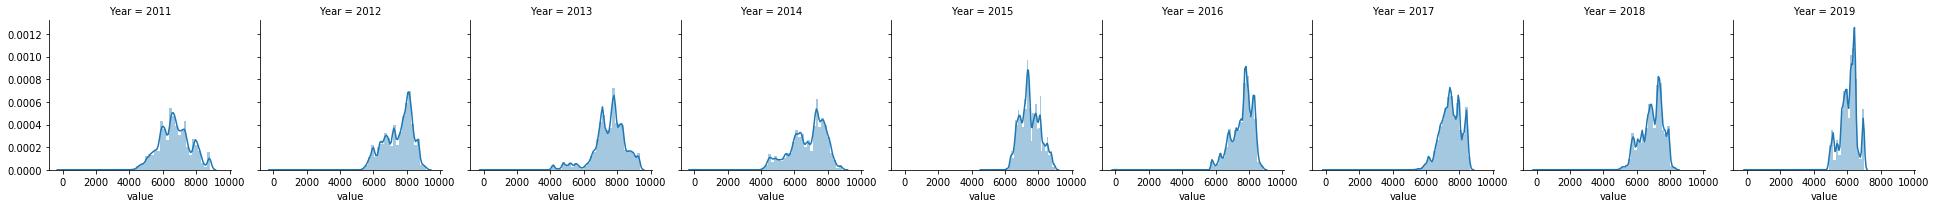

C:\Users\Chris\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



Below:  wind each year from 2011 to 2019


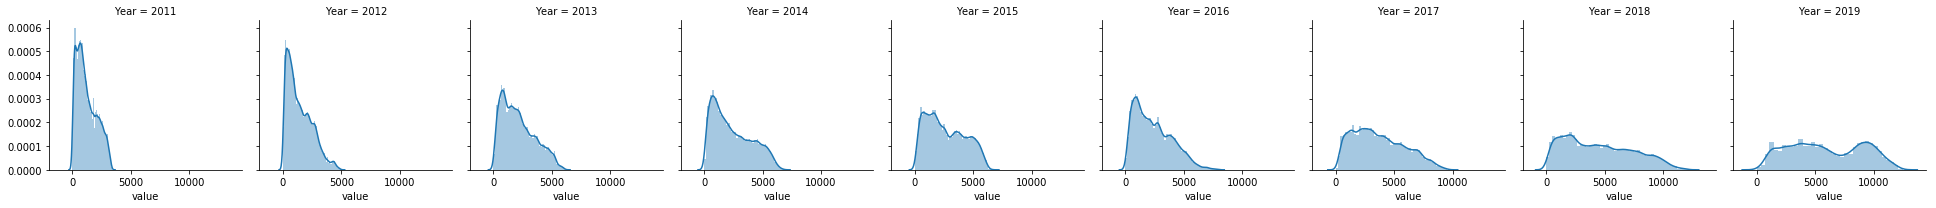

In [6]:
#f, axes = plt.subplots(1,1, figsize=(15,10), sharex=True)
#axes.set_xlim([0,30000])

notToUse = [' pumped']

for label in (set(data161melted['Label'].unique()) - set(notToUse)):
    if label == ' solar':
        
        g = sns.FacetGrid(data161melted[(data161melted['Label']==label) &
                                        (data161melted['Year']>2016)], 
                          col='Year',size=3, aspect=1,
                      sharex=True, sharey=True)
        g.map(sns.distplot,'value', label=label) #shade=True)
        print('Below:',label,'each year from 2017 to 2019 (only have this data)')
    else:
        
        g = sns.FacetGrid(data161melted[(data161melted['Label']==label)], col='Year',size=3, aspect=1,
                      sharex=True, sharey=True)
        g.map(sns.distplot,'value', label=label) #shade=True)
        print('Below:',label,'each year from 2011 to 2019')
        
    plt.savefig(label.strip() + '.png')
    plt.show()
    #plt.legend()
    #sns.distplot(data161[label], hist=False, label=label)
#g = sns.distplot(data121[' wind'], color='red', label='Wind',axlabel='MW')
#axes.set(title= 'All the electricity sources (minus pumped) at 5min intervals',\
 #      xlabel = 'MW')

#f.legend()
#f.se




{'whiskers': [<matplotlib.lines.Line2D at 0x1cd2cecc828>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd37aeec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd2cecc4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd2cda3c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd2cda3f28>],
 'means': []}

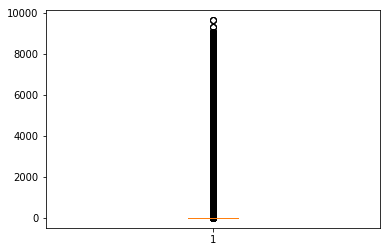

In [7]:
plt.boxplot(data161[' solar'])

In [8]:
data161[' solar'].describe()
data161[data161['id']>550000]

,timestamp,id,demand,coal,nuclear,ccgt,wind,pumped,hydro,biomass,...,nemo,other,north_south,scotland_england,Hour,Min,DayHour,Year,Month,Day
549996,2016-08-23 11:50:03,550001,30901,1435,8347,17500,775,323,135,734,...,0,0,-2453,-489,11,50,11.833333,2016,8,23
549997,2016-08-23 11:55:02,550002,30881,1441,8351,17481,769,315,136,735,...,0,0,-2453,-489,11,55,11.916667,2016,8,23
549998,2016-08-23 12:00:03,550003,30799,1434,8353,17383,772,299,170,736,...,0,0,-2453,-489,12,0,12.000000,2016,8,23
549999,2016-08-23 12:05:05,550004,30762,1435,8354,17353,762,310,162,733,...,0,0,-2453,-489,12,5,12.083333,2016,8,23
550000,2016-08-23 12:10:02,550005,30801,1437,8356,17483,773,367,131,734,...,0,0,-2453,-489,12,10,12.166667,2016,8,23
550001,2016-08-23 12:15:02,550006,30756,1434,8348,17557,789,353,129,735,...,0,0,-2453,-489,12,15,12.250000,2016,8,23
550002,2016-08-23 12:20:03,550007,30772,1433,8347,17549,796,372,129,734,...,0,0,-2453,-489,12,20,12.333333,2016,8,23
550003,2016-08-23 12:25:02,550008,30897,1434,8348,17535,799,381,256,733,...,0,0,-2453,-489,12,25,12.416667,2016,8,23
550004,2016-08-23 12:30:03,550009,30854,1435,8352,17501,785,382,255,734,...,0,0,-2453,-489,12,30,12.500000,2016,8,23
550005,2016-08-23 12:35:03,550010,30814,1433,8352,17486,791,351,255,735,...,0,0,-1745,-151,12,35,12.583333,2016,8,23


In [9]:
def nowtime():
    now=datetime.datetime.now()
    return "".join([str(i) for i in (now.day,0,now.month,now.year,now.hour,now.minute)])

In [10]:
data161.columns

Index([' timestamp', 'id', ' demand', ' coal', ' nuclear', ' ccgt', ' wind',
       ' pumped', ' hydro', ' biomass', ' oil', ' solar', ' ocgt',
       ' french_ict', ' dutch_ict', ' irish_ict', ' ew_ict', ' nemo', ' other',
       ' north_south', ' scotland_england', 'Hour', 'Min', 'DayHour', 'Year',
       'Month', 'Day'],
      dtype='object')

In [11]:
data161.loc[:,' demand']

0         38874
1         38845
2         38745
3         38826
4         38865
5         38881
6         38876
7         38911
8         38829
9         38735
10        38518
11        38319
12        38249
13        38131
14        38018
15        37906
16        37884
17        37791
18        37619
19        37571
20        37424
21        37285
22        37330
23        37149
24        37054
25        36940
26        36822
27        36677
28        36641
29        36489
          ...  
827651    34569
827652    34539
827653    34466
827654    34419
827655    34465
827656    34567
827657    34496
827658    34389
827659    34289
827660    34195
827661    34098
827662    33161
827663    34018
827664    33993
827665    34010
827666    33982
827667    33960
827668    33858
827669    33964
827670    34015
827671    34059
827672    34097
827673    34009
827674    33959
827675    33981
827676    34053
827677    34119
827678    34194
827679    34213
827680    34197
Name:  demand, Length: 8

In [12]:
# Clean up the demand data so there aren't 200 GW spikes

#data161['new demand'] = data161.apply(lambda row: np.where(row[' demand']>1e5,
#                                                           data161[' demand'][row['id']-6],
#                                                           row[' demand']),axis=1)
#data161['new demand'] = data161.apply(lambda row: row[' demand'] if
                                     # (row[' demand']<1e5) 
                                     # (data161[' demand'][row['id']-6])>1e5,
                                     # (data161[' demand'][row['id']-7]),
                                      #axis=1)

def checkRow(row, thresh=1e5):
    if row[' demand'] < thresh:
        return row[' demand']
    else:
        for i in range(5,12):
            if (data161[' demand'][row['id']-i])<thresh:
                return (data161[' demand'][row['id']-i])

data161[' demand'] = data161.apply(lambda row: checkRow(row,1e5),axis=1)
                                   

In [13]:
data161[data161[' demand']>1e5]

,timestamp,id,demand,coal,nuclear,ccgt,wind,pumped,hydro,biomass,...,nemo,other,north_south,scotland_england,Hour,Min,DayHour,Year,Month,Day


In [14]:
data161.iloc[380800:380815,:]

,timestamp,id,demand,coal,nuclear,ccgt,wind,pumped,hydro,biomass,...,nemo,other,north_south,scotland_england,Hour,Min,DayHour,Year,Month,Day
380800,2015-01-12 09:20:05,380805,30127,9181,8229,3839,4212,122,796,1045,...,0,0,0,0,9,20,9.333333,2015,1,12
380801,2015-01-12 09:25:01,380806,30127,9181,8229,3839,4212,122,796,1045,...,0,0,0,0,9,25,9.416667,2015,1,12
380802,2015-01-12 09:30:01,380807,30127,9181,8229,3839,4212,122,796,1045,...,0,0,0,0,9,30,9.500000,2015,1,12
380803,2015-01-12 09:35:02,380808,30127,9181,8229,3839,4212,122,796,1045,...,0,0,0,0,9,35,9.583333,2015,1,12
380804,2015-01-12 09:40:01,380809,89645,14338,8226,9133,4762,342,795,1035,...,0,0,0,0,9,40,9.666667,2015,1,12
380805,2015-01-12 09:45:01,380810,89645,14573,8227,8563,5352,116,865,1078,...,0,0,0,0,9,45,9.750000,2015,1,12
380806,2015-01-12 09:50:06,380811,89645,14587,8220,8839,5353,606,1014,1064,...,0,0,0,0,9,50,9.833333,2015,1,12
380807,2015-01-12 09:55:03,380812,89645,14587,8220,8839,5353,606,1014,1064,...,0,0,0,0,9,55,9.916667,2015,1,12
380808,2015-01-12 10:00:01,380813,89645,14587,8220,8839,5353,606,1014,1064,...,0,0,0,0,10,0,10.000000,2015,1,12
380809,2015-01-12 10:05:03,380814,89645,14587,8220,8839,5353,606,1014,1064,...,0,0,0,0,10,5,10.083333,2015,1,12


In [15]:
#! jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [16]:
# Plot demand IN ONE DAY/WEEK/MONTH with Bokeh

dataLength = 'month'

output_file("C:/Users/Chris/Documents/Documents/Python2018/DataVisCW/Plots/AllTheSquiggles"+nowtime()+".html")
fig = figure(plot_width=900, plot_height=600,
             title='UK electricity demand',
            x_axis_type='datetime', toolbar_location="above")
pts = len(data161)

output_notebook()

daySlot = 24*12 # number of data points (5min periods) in 24hrs
weekSlot = 7*daySlot
monthSlot = 30*daySlot

lastDay = datetime.datetime(2019,(data161['Month']).iloc[pts-1],(data161['Day']).iloc[pts-1]-1)
print(lastDay)
rangeEnd = pts-monthSlot

def updateToolTips(dataLength=dataLength):
    tooltips = []#('Demand','@{ demand}{( 0,0)}MW')]
    if dataLength == 'month':
        slot, space = monthSlot, 12
        tooltips.insert(0,('Time','@{ timestamp}{%H:%M}'))
        tooltips.insert(1,('Date','@{ timestamp}{%a %e-%b}'))
    elif dataLength == 'week':
        slot,space = weekSlot, 3
        tooltips.insert(0,('Time','@{ timestamp}{%H:%M}'))
        tooltips.insert(1,('Date','@{ timestamp}{%a %e-%b}'))
    elif dataLength == 'day':
        slot,space = daySlot, 1
        tooltips.insert(0,('Time','@{ timestamp}{%H:%M}'))
    return tooltips, slot, space

tooltips,slot,space = updateToolTips()
dataSource = ColumnDataSource(data161.iloc[-slot::space,:])

# Choose columns to have as options in the plot
zlist = ['Demand','Nuclear','Wind','Coal','CCGT','Solar','French_ICT'] 
ylist = [' '+z.lower() for z in zlist]
dictOfLines={}

# Plot ALL of the lines and put in dictionary to set their visibility on update
for colRef,line in enumerate(ylist,1):
    if line in dataSource.column_names:
        lines = fig.line(x=' timestamp', y=line, source=dataSource, 
                         color = Category10[(len(ylist)+2)][colRef],
                        line_width=2) 
        dictOfLines[line]=lines
        #legend.append((str(ylist[colRef-1])+' ',[lines]))
        tips2 = [(zlist[colRef-1],'@{'+line+'}{( 0,0)}MW')]
        if line == ' demand':
            tips2 = list(set(tips2+tooltips))
        hover2 = HoverTool(tooltips =tips2, 
                          formatters={' timestamp': 'datetime'},
                          renderers=[lines], toggleable=False,
                         mode='vline')
        fig.add_tools(hover2)
#select = interact(update,
#        Demand = True, 
#         Nuclear = True, 
#         Wind = True, 
#         Coal=False, 
#         CCGT=False, 
#         Solar=False, 
#         French_ICT=False,
#         timerange=radio,
#         startPt = slider)
#layout = row(fig)        
#curdoc().add_root(layout,select)
#show(fig, notebook_handle=True)

#show(fig)
handle=show(fig, notebook_handle=True)

def update(Demand, Nuclear, Wind, Coal, CCGT, Solar, French_ICT,timerange='month',startPt=rangeEnd):
    tooltips,slot,space = updateToolTips(timerange)
    showcols=[' timestamp']
   # print(locals())
    newMax=0
    data161subset = data161.iloc[startPt:startPt+slot:space,:]
    for colname in zlist:
        if (colname in locals().keys())and locals()[colname]==True:
       #     print(colname, locDict161[colname])
            showcols.append(' '+colname.lower())
            if data161subset[showcols[-1]].max() > newMax:
                newMax = data161subset[showcols[-1]].max()
     
    dataSource.data.update(ColumnDataSource(data161subset).data)
   # print(newMax)
    for colRef,line in enumerate(ylist,1):
        if line in dataSource.column_names:
            if line in showcols:
                dictOfLines[line].visible = True
            else:
                dictOfLines[line].visible = False
    fig.y_range.update()#Range1d(0,newMax))
    fig.y_range.start=0
    fig.y_range.end=1000*newMax//1000+1000
    #curdoc().add_root(layout,select)
    #handle = show(fig, notebook_handle=True)
    
    push_notebook(handle=handle)
    #show(fig, notebook_handle=True)
fig.add_tools(CrosshairTool(dimensions='height'))  
fig.outline_line_color = None
fig.background_fill_color = "#efefef"


fig.y_range=Range1d(0, data161.iloc[-slot::space,:][' demand'].max())

fig.xaxis.minor_tick_line_color = 'black'
fig.xaxis.formatter = DatetimeTickFormatter(days = [ '%a %e-%b %Y'], hours=['%R'])

#fig.axis.major_tick_line_color = None
fig.axis.axis_line_color = 'black'
#fig.yaxis.axis_label = 'Total electricity supplied in Quarter (TWh)'

#inputs = column(daySlider)
#curdoc().add_root(row(inputs, fig, width=800))
#curdoc().title = "DemandInADay"



         #timerange=['day','week','month'])

#show(fig)
radio = widgets.RadioButtons(
    options=['day','week','month'],
     value='week',
    description='Time Range:',
    disabled=False
)


slider = widgets.IntSlider(
    value=rangeEnd,
    min=1,
    max=rangeEnd,
    step=daySlot,
    description='Date selection',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    slider_color='white')

interact(update,
        Demand = True, 
         Nuclear = True, 
         Wind = True, 
         Coal=False, 
         CCGT=False, 
         Solar=False, 
         French_ICT=False,
         timerange=radio,
         startPt = slider
        )   

# At the moment it is plotting based on 'handle' which is created before the figure is updated
# when the figure is updated, the y axis limits change, so the version of 'fig' in 'handle' is out of date
# Unable to update the handle without calling 'show', which re-plots the graph each time which is not what is wanted
# Could make separate 'update y-axis' button

Loading BokehJS ...

2019-04-15 00:00:00


interactive(children=(Checkbox(value=True, description='Demand'), Checkbox(value=True, description='Nuclear'),…

<function __main__.update(Demand, Nuclear, Wind, Coal, CCGT, Solar, French_ICT, timerange='month', startPt=819041)>

In [17]:
from numpy.random import random
N = 300
source = ColumnDataSource(data={'x': random(N), 'y': random(N)})
# Create plots and widgets
plot = figure()
plot.circle(x= 'x', y='y', source=source)
slider = Slider(start=100, end=1000, value=N,
     step=10, title='Number of points')
# Add callback to widgets
def callback(attr, old, new):
     N = slider.value
     source.data={'x': random(N), 'y': random(N)}
slider.on_change('value', callback)
# Arrange plots and widgets in layouts
layout = column(slider, plot)
curdoc().add_root(layout)
